## 23-03-2025

In [26]:
#  Visualize Association Rules (Network Graph)

import pandas as pd
data = [['milk', 'bread', 'butter'],
        ['beer', 'bread'],
        ['milk', 'bread', 'butter', 'beer'],
        ['bread', 'butter']]

df = pd.DataFrame({'Transaction': data})
df

,Transaction
0,"[milk, bread, butter]"
1,"[beer, bread]"
2,"[milk, bread, butter, beer]"
3,"[bread, butter]"


In [30]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [31]:
te=TransactionEncoder()

In [32]:
te_ary=te.fit(data).transform(data)
te_ary

array([[False,  True,  True,  True],
       [ True,  True, False, False],
       [ True,  True,  True,  True],
       [False,  True,  True, False]])

In [33]:
df_encoded=pd.DataFrame(te_ary,columns=te.columns_)
df_encoded

,beer,bread,butter,milk
0,False,True,True,True
1,True,True,False,False
2,True,True,True,True
3,False,True,True,False


In [34]:
frequent_itemset=apriori(df_encoded,min_support=0.5,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.50,(beer)
1,1.00,(bread)
2,0.75,(butter)
3,0.50,(milk)
4,0.50,"(bread, beer)"
5,0.75,"(bread, butter)"
6,0.50,"(bread, milk)"
7,0.50,"(milk, butter)"
8,0.50,"(milk, bread, butter)"


In [39]:
rules=association_rules(frequent_itemset,metric="lift",min_threshold=0.8,num_itemsets='int')
rules

C:\Users\91805\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bread),(beer),1.00,0.50,0.50,0.500000,1.000000,1.0,0.000,1.0,0.0,0.500000,0.000000,0.750000
1,(beer),(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000
2,(bread),(butter),1.00,0.75,0.75,0.750000,1.000000,1.0,0.000,1.0,0.0,0.750000,0.000000,0.875000
3,(butter),(bread),0.75,1.00,0.75,1.000000,1.000000,1.0,0.000,inf,0.0,0.750000,0.000000,0.875000
4,(bread),(milk),1.00,0.50,0.50,0.500000,1.000000,1.0,0.000,1.0,0.0,0.500000,0.000000,0.750000
5,(milk),(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000
6,(milk),(butter),0.50,0.75,0.50,1.000000,1.333333,1.0,0.125,inf,0.5,0.666667,1.000000,0.833333
7,(butter),(milk),0.75,0.50,0.50,0.666667,1.333333,1.0,0.125,1.5,1.0,0.666667,0.333333,0.833333
8,"(bread, milk)",(butter),0.50,0.75,0.50,1.000000,1.333333,1.0,0.125,inf,0.5,0.666667,1.000000,0.833333
9,"(milk, butter)",(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000


In [40]:
import networkx as nx
import matplotlib.pyplot as plt

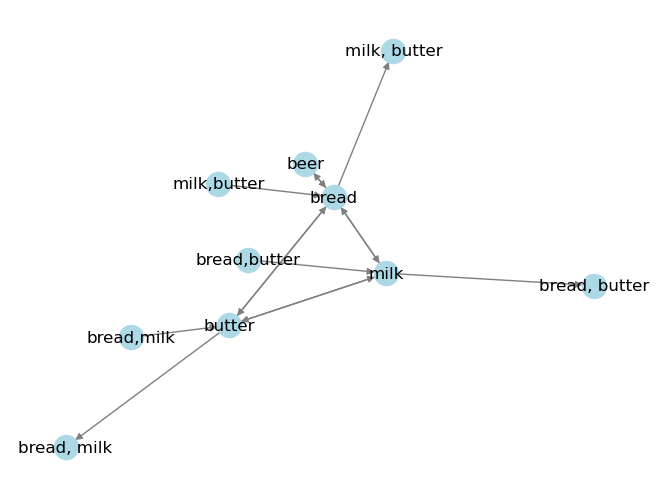

In [42]:
G=nx.DiGraph()
for _,row in rules.iterrows():
    G.add_edge(','.join(row['antecedents']),', '.join(row['consequents']),weight=row['lift'])

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()



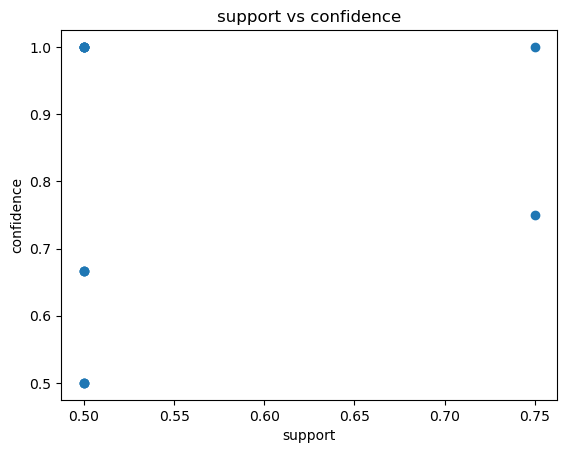

In [43]:
# Association Rules on Synthetic Data with Scatter Plot of Support vs Confidence
import random

items=['milk','bread','butter','jam','cheese','eggs']
data=[[random.choice(items) for _ in range(random.randint(2,4))] for _ in range(20)]

plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()

In [1]:
# Filter High-Lift Rules (>2) from Groceries Dataset

import pandas as pd
df=pd.read_csv('Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth,association_rules

In [3]:
basket=df.groupby(['Member_number','Date'])['itemDescription'].apply(list).reset_index()
basket

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


In [4]:
te=TransactionEncoder()

In [5]:
te_ary=te.fit(basket['itemDescription']).transform(basket['itemDescription'])
te_ary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
df_encoded=pd.DataFrame(te_ary,columns=te.columns_)
df_encoded

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())

    support       itemsets
0  0.157923   (whole milk)
1  0.085879       (yogurt)
2  0.060349      (sausage)
3  0.051728       (pastry)
4  0.018780  (salty snack)


In [13]:
rules = association_rules(frequent_itemsets, num_itemsets=len(df_encoded),metric="confidence", min_threshold=0.05)

In [14]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,1.0,-0.003707,0.956636,-0.260917,0.047776,-0.045329,0.096694
3,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,1.0,-0.003707,0.974663,-0.274587,0.047776,-0.025995,0.096694
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,1.0,-0.003404,0.964550,-0.214986,0.055000,-0.036752,0.107711
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235
8,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730
9,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

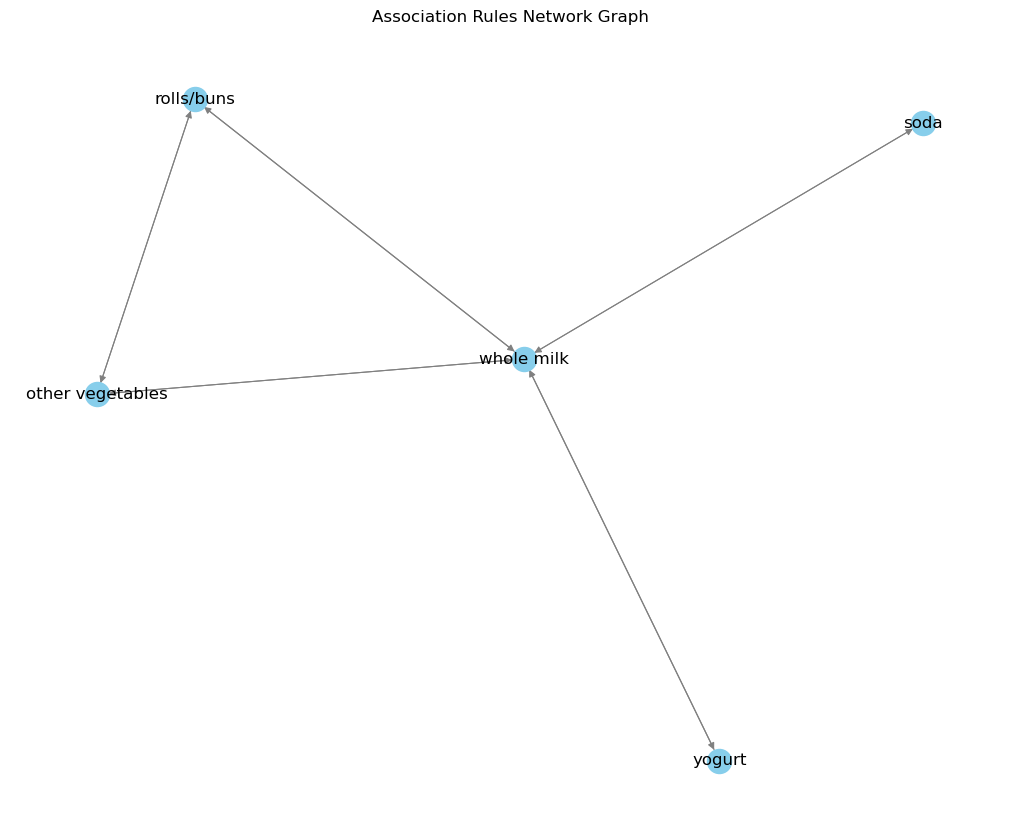

In [16]:
G = nx.DiGraph()

for _, row in rules.iterrows():
    G.add_edge(', '.join(list(row['antecedents'])), ', '.join(list(row['consequents'])), weight=row['lift'])

pos = nx.spring_layout(G, k=0.5, iterations=50)
edges = G.edges(data=True)
weights = [edata['weight'] for _, _, edata in edges]

plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', width=weights)
plt.title("Association Rules Network Graph")
plt.show()

In [18]:
rules = association_rules(frequent_itemsets, num_itemsets=len(df_encoded),metric="lift", min_threshold=0.05)

In [20]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,1.0,-0.003707,0.956636,-0.260917,0.047776,-0.045329,0.096694
3,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,1.0,-0.003707,0.974663,-0.274587,0.047776,-0.025995,0.096694
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,1.0,-0.003404,0.964550,-0.214986,0.055000,-0.036752,0.107711
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235
8,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730
9,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730


In [22]:
high_lift_rules = rules[rules['lift'] > 2]

if not high_lift_rules.empty:
    high_lift_rules[['antecedents', 'consequents', 'lift']].plot(
        kind='bar', 
        x='antecedents', 
        y='lift',
        figsize=(10,5),
        color='skyblue'
    )
    plt.title('High Lift Rules')
    plt.ylabel('Lift')
    plt.show()
else:
    print("🚩 No rules found with lift > 2.")


🚩 No rules found with lift > 2.


In [23]:
high_lift_rules = rules[rules['lift'] > 1.1]


In [24]:
print(rules[['antecedents', 'consequents', 'lift']].sort_values(by='lift', ascending=False).head(10))


          antecedents         consequents      lift
0            (yogurt)        (whole milk)  0.822940
1        (whole milk)            (yogurt)  0.822940
5        (rolls/buns)        (whole milk)  0.804028
4        (whole milk)        (rolls/buns)  0.804028
6  (other vegetables)        (rolls/buns)  0.786154
7        (rolls/buns)  (other vegetables)  0.786154
9  (other vegetables)        (whole milk)  0.769430
8        (whole milk)  (other vegetables)  0.769430
2              (soda)        (whole milk)  0.758296
3        (whole milk)              (soda)  0.758296


# 24-03-2025

In [6]:
# Association Rules with Minimum Support and Lift Constraints
import pandas as pd
data = [['milk', 'bread', 'butter'],
        ['bread', 'jam'],
        ['milk', 'butter', 'eggs'],
        ['bread', 'butter', 'cheese'],
        ['jam', 'bread', 'milk']]


In [7]:
from mlxtend.preprocessing import TransactionEncoder

In [8]:
te=TransactionEncoder()

In [9]:
te_ary=te.fit(data).transform(data)
te_ary

array([[ True,  True, False, False, False,  True],
       [ True, False, False, False,  True, False],
       [False,  True, False,  True, False,  True],
       [ True,  True,  True, False, False, False],
       [ True, False, False, False,  True,  True]])

In [10]:
df=pd.DataFrame(te_ary,columns=te.columns_)

In [11]:
df

,bread,butter,cheese,eggs,jam,milk
0,True,True,False,False,False,True
1,True,False,False,False,True,False
2,False,True,False,True,False,True
3,True,True,True,False,False,False
4,True,False,False,False,True,True


In [12]:
from mlxtend.frequent_patterns import apriori, association_rules

In [13]:
frequent=apriori(df,min_support=0.3,use_colnames=True)
frequent

,support,itemsets
0,0.8,(bread)
1,0.6,(butter)
2,0.4,(jam)
3,0.6,(milk)
4,0.4,"(butter, bread)"
5,0.4,"(jam, bread)"
6,0.4,"(bread, milk)"
7,0.4,"(butter, milk)"


In [15]:
rules=association_rules(frequent,metric='confidence',min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(butter),(bread),0.6,0.8,0.4,0.666667,0.833333,1.0,-0.08,0.6,-0.333333,0.4,-0.666667,0.583333
1,(jam),(bread),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.5,1.000000,0.750000
2,(milk),(bread),0.6,0.8,0.4,0.666667,0.833333,1.0,-0.08,0.6,-0.333333,0.4,-0.666667,0.583333
3,(butter),(milk),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.250000,0.5,0.166667,0.666667
4,(milk),(butter),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.250000,0.5,0.166667,0.666667


In [16]:
rules=rules[rules['lift']>1.5]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [17]:
# Compare Apriori and FP-Growth

import pandas as pd
data = [
    ['milk', 'bread', 'butter'],
    ['bread', 'jam', 'honey'],
    ['milk', 'butter', 'eggs', 'bread'],
    ['bread', 'butter', 'cheese', 'milk'],
    ['jam', 'bread', 'milk'],
    ['milk', 'eggs', 'flour', 'sugar'],
    ['bread', 'butter', 'sugar', 'flour'],
    ['milk', 'jam', 'bread', 'butter'],
    ['eggs', 'flour', 'butter'],
    ['bread', 'butter', 'milk', 'eggs', 'jam'],
    ['bread', 'cheese', 'butter', 'milk'],
    ['bread', 'jam', 'honey', 'milk'],
    ['flour', 'butter', 'bread'],
    ['milk', 'eggs', 'bread'],
    ['bread', 'butter', 'milk', 'honey']
]


In [18]:
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth

In [19]:
start_ap=time.time()
start_ap

1742799400.7904613

In [20]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [21]:
te=TransactionEncoder()

In [22]:
te_ary=te.fit(data).transform(data)

In [23]:
df=pd.DataFrame(te_ary,columns=te.columns_)

In [25]:
frequent_ap=apriori(df,min_support=0.3,use_colnames=True)
frequent_ap

,support,itemsets
0,0.866667,(bread)
1,0.666667,(butter)
2,0.333333,(eggs)
3,0.333333,(jam)
4,0.733333,(milk)
5,0.600000,"(butter, bread)"
6,0.333333,"(jam, bread)"
7,0.666667,"(bread, milk)"
8,0.466667,"(butter, milk)"
9,0.466667,"(butter, bread, milk)"


In [26]:
end_ap=time.time()
end_ap

1742799678.0699124

In [27]:
# FP-Growth
start_fp=time.time()
start_fp

1742799718.7434356

In [28]:
frequent_fp=fpgrowth(df,min_support=0.3,use_colnames=True)
frequent_fp

,support,itemsets
0,0.866667,(bread)
1,0.733333,(milk)
2,0.666667,(butter)
3,0.333333,(jam)
4,0.333333,(eggs)
5,0.666667,"(bread, milk)"
6,0.600000,"(butter, bread)"
7,0.466667,"(butter, milk)"
8,0.466667,"(butter, bread, milk)"
9,0.333333,"(jam, bread)"


In [29]:
end_fp=time.time()
end_fp

1742799761.7021418

In [30]:
methods=['Apriori','FP_Growth']
methods

['Apriori', 'FP_Growth']

In [32]:
times=[end_ap-start_ap,end_fp-start_fp]
times

[277.2794511318207, 42.95870614051819]

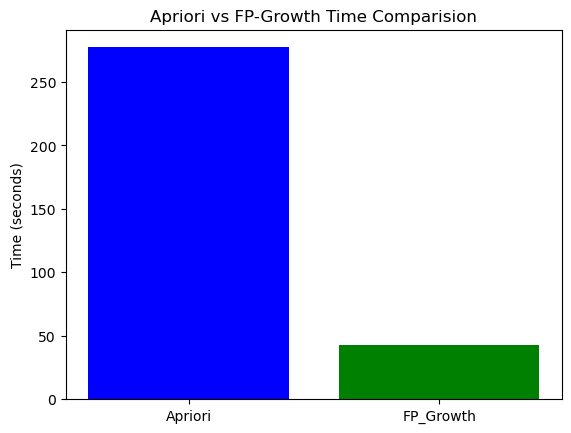

In [33]:
plt.bar(methods,times,color=['blue','green'])
plt.title('Apriori vs FP-Growth Time Comparision')
plt.ylabel('Time (seconds)')
plt.show()

In [37]:
print(len(frequent_ap))

10


In [38]:
print(len(frequent_fp))

10


In [39]:
# Heatmap of Support vs Lift

import pandas as pd
data = [
    ['milk', 'bread', 'butter'],
    ['bread', 'jam', 'honey'],
    ['milk', 'butter', 'eggs', 'bread'],
    ['bread', 'butter', 'cheese', 'milk'],
    ['jam', 'bread', 'milk'],
    ['milk', 'eggs', 'flour', 'sugar'],
    ['bread', 'butter', 'sugar', 'flour'],
    ['milk', 'jam', 'bread', 'butter'],
    ['eggs', 'flour', 'butter'],
    ['bread', 'butter', 'milk', 'eggs', 'jam'],
    ['bread', 'cheese', 'butter', 'milk'],
    ['bread', 'jam', 'honey', 'milk'],
    ['flour', 'butter', 'bread'],
    ['milk', 'eggs', 'bread'],
    ['bread', 'butter', 'milk', 'honey']
]


In [40]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [41]:
te=TransactionEncoder()

In [42]:
te_ary=te.fit(data).transform(data)

In [45]:
df=pd.DataFrame(te_ary,columns=te.columns_)

In [46]:
frequent=apriori(df,min_support=0.3,use_colnames=True)
frequent

,support,itemsets
0,0.866667,(bread)
1,0.666667,(butter)
2,0.333333,(eggs)
3,0.333333,(jam)
4,0.733333,(milk)
5,0.600000,"(butter, bread)"
6,0.333333,"(jam, bread)"
7,0.666667,"(bread, milk)"
8,0.466667,"(butter, milk)"
9,0.466667,"(butter, bread, milk)"


In [47]:
rules=association_rules(frequent,metric='confidence',min_threshold=0.5)

In [48]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(butter),(bread),0.666667,0.866667,0.600000,0.900000,1.038462,1.0,0.022222,1.333333,0.111111,0.642857,0.250000,0.796154
1,(bread),(butter),0.866667,0.666667,0.600000,0.692308,1.038462,1.0,0.022222,1.083333,0.277778,0.642857,0.076923,0.796154
2,(jam),(bread),0.333333,0.866667,0.333333,1.000000,1.153846,1.0,0.044444,inf,0.200000,0.384615,1.000000,0.692308
3,(bread),(milk),0.866667,0.733333,0.666667,0.769231,1.048951,1.0,0.031111,1.155556,0.350000,0.714286,0.134615,0.839161
4,(milk),(bread),0.733333,0.866667,0.666667,0.909091,1.048951,1.0,0.031111,1.466667,0.175000,0.714286,0.318182,0.839161
5,(butter),(milk),0.666667,0.733333,0.466667,0.700000,0.954545,1.0,-0.022222,0.888889,-0.125000,0.500000,-0.125000,0.668182
6,(milk),(butter),0.733333,0.666667,0.466667,0.636364,0.954545,1.0,-0.022222,0.916667,-0.151515,0.500000,-0.090909,0.668182
7,"(butter, bread)",(milk),0.600000,0.733333,0.466667,0.777778,1.060606,1.0,0.026667,1.200000,0.142857,0.538462,0.166667,0.707071
8,"(butter, milk)",(bread),0.466667,0.866667,0.466667,1.000000,1.153846,1.0,0.062222,inf,0.250000,0.538462,1.000000,0.769231
9,"(bread, milk)",(butter),0.666667,0.666667,0.466667,0.700000,1.050000,1.0,0.022222,1.111111,0.142857,0.538462,0.100000,0.700000


In [50]:
import seaborn as sns

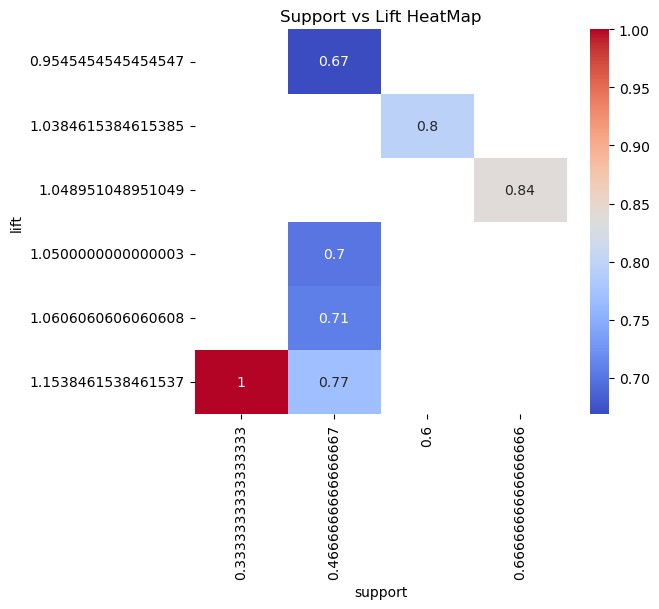

In [55]:
plt.figure(figsize=(6,5))
sns.heatmap(rules.pivot_table(index='lift',columns='support', values='confidence'), annot=True, cmap='coolwarm')
plt.title('Support vs Lift HeatMap')
plt.show()

In [56]:
# Movie Recommendation Using Association Rules

movies = [['Inception', 'Titanic', 'Avatar'],
          ['Titanic', 'Avatar'],
          ['Inception', 'Interstellar'],
          ['Titanic', 'Inception'],
          ['Avatar', 'Interstellar']]

In [57]:
import pandas  as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [58]:
te=TransactionEncoder()

In [59]:
te_ary=te.fit(movies).transform(movies)

In [60]:
df_movies=pd.DataFrame(te_ary,columns=te.columns_)

In [61]:
frequent=apriori(df_movies,min_support=0.3,use_colnames=True)
frequent

,support,itemsets
0,0.6,(Avatar)
1,0.6,(Inception)
2,0.4,(Interstellar)
3,0.6,(Titanic)
4,0.4,"(Avatar, Titanic)"
5,0.4,"(Inception, Titanic)"


In [62]:
rules=association_rules(frequent, metric='confidence', min_threshold=0.5)

In [63]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Avatar),(Titanic),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.25,0.5,0.166667,0.666667
1,(Titanic),(Avatar),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.25,0.5,0.166667,0.666667
2,(Inception),(Titanic),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.25,0.5,0.166667,0.666667
3,(Titanic),(Inception),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.25,0.5,0.166667,0.666667


# CLUSTERING

In [84]:
# K-Means Clustering on Customer Segmentation

import pandas as pd

data = {'Age': [25, 34, 22, 27, 45, 52, 46, 56, 55, 60],
        'Annual_Income': [25000, 48000, 20000, 27000, 60000, 52000, 49000, 80000, 75000, 85000]}
df = pd.DataFrame(data)
df

,Age,Annual_Income
0,25,25000
1,34,48000
2,22,20000
3,27,27000
4,45,60000
5,52,52000
6,46,49000
7,56,80000
8,55,75000
9,60,85000


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x=df[['Age']]
y=df['Annual_Income']

In [87]:
x

,Age
0,25
1,34
2,22
3,27
4,45
5,52
6,46
7,56
8,55
9,60


In [88]:
y

0    25000
1    48000
2    20000
3    27000
4    60000
5    52000
6    49000
7    80000
8    75000
9    85000
Name: Annual_Income, dtype: int64

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
x_train

,Age
5,52
0,25
7,56
2,22
9,60
4,45
3,27
6,46


In [91]:
x_test

,Age
8,55
1,34


In [92]:

y_train

5    52000
0    25000
7    80000
2    20000
9    85000
4    60000
3    27000
6    49000
Name: Annual_Income, dtype: int64

In [93]:
y_test

8    75000
1    48000
Name: Annual_Income, dtype: int64

In [94]:
from sklearn.cluster import KMeans

In [95]:
model=KMeans(n_clusters=5,random_state=42)

In [96]:
model.fit(x_train,y_train)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [100]:
df['cluster']=model.fit_predict(df)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [101]:
import matplotlib.pyplot as plt

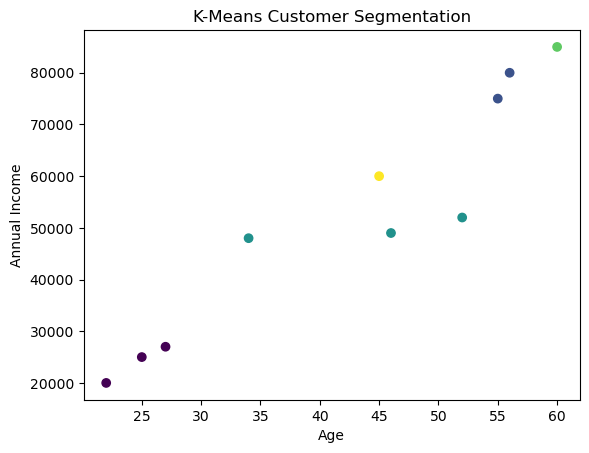

In [102]:
plt.scatter(df['Age'], df['Annual_Income'], c=df['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('K-Means Customer Segmentation')
plt.show()

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

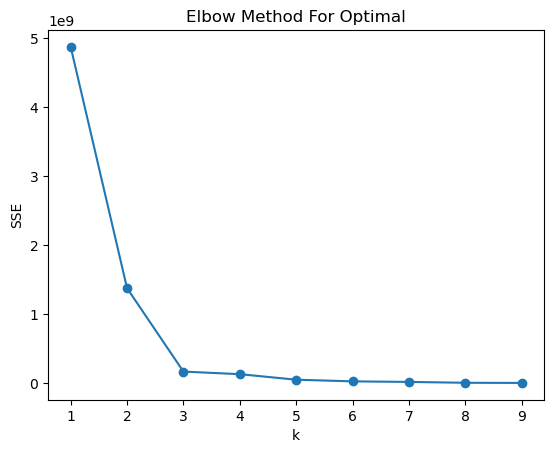

In [104]:
# Elbow Method for Optimal k

sse=[]
for k in range(1,10):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(df[['Age','Annual_Income']])
    sse.append(model.inertia_)

plt.plot(range(1,10),sse,marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal')
plt.show()

In [107]:
# Hierarchical Clustering + Dendrogram

from scipy.cluster.hierarchy import dendrogram,linkage

In [109]:
linked=linkage(df[['Age','Annual_Income']],method='ward')
linked

array([[1.00000000e+00, 6.00000000e+00, 1.00007200e+03, 2.00000000e+00],
       [0.00000000e+00, 3.00000000e+00, 2.00000100e+03, 2.00000000e+00],
       [5.00000000e+00, 1.00000000e+01, 4.04147564e+03, 3.00000000e+00],
       [7.00000000e+00, 8.00000000e+00, 5.00000010e+03, 2.00000000e+00],
       [2.00000000e+00, 1.10000000e+01, 6.92820477e+03, 3.00000000e+00],
       [9.00000000e+00, 1.30000000e+01, 8.66025560e+03, 3.00000000e+00],
       [4.00000000e+00, 1.20000000e+01, 1.26556971e+04, 4.00000000e+00],
       [1.50000000e+01, 1.60000000e+01, 5.13830210e+04, 7.00000000e+00],
       [1.40000000e+01, 1.70000000e+01, 8.22683922e+04, 1.00000000e+01]])

In [110]:
import matplotlib.pyplot as plt

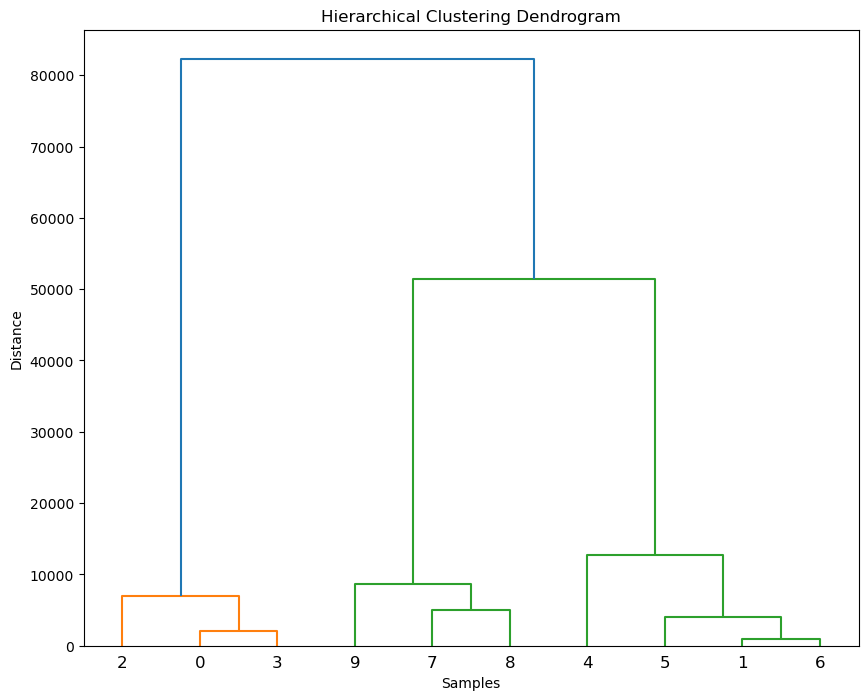

In [111]:
plt.figure(figsize=(10,8))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [113]:
# DBSCAN for Outlier Detection

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [114]:
scaler=StandardScaler()

In [116]:
scaled_data=scaler.fit_transform(df[['Age','Annual_Income']])
scaled_data

array([[-1.28501418, -1.22815693],
       [-0.61262304, -0.18580972],
       [-1.50914456, -1.45475415],
       [-1.13559393, -1.13751804],
       [ 0.20918835,  0.35802361],
       [ 0.73215924, -0.00453194],
       [ 0.28389848, -0.14049028],
       [ 1.03099975,  1.26441249],
       [ 0.95628962,  1.03781527],
       [ 1.32984026,  1.49100971]])

In [117]:
dbscan=DBSCAN(eps=1,min_samples=2,metric='euclidean')

In [118]:
df['DBSCAN']=dbscan.fit_predict(scaled_data)

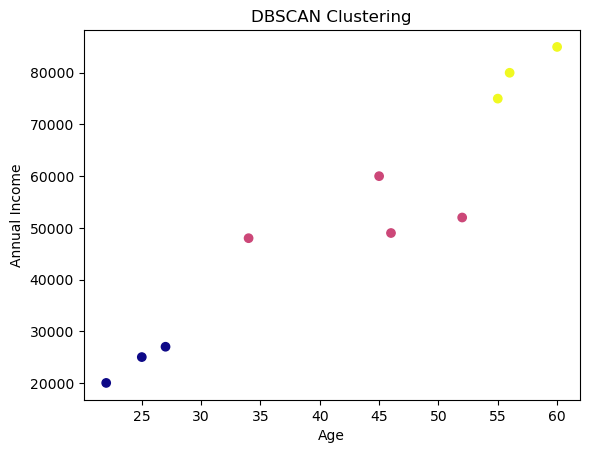

In [119]:
plt.scatter(df['Age'],df['Annual_Income'],c=df['DBSCAN'],cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [146]:
# K-Means Clustering on Iris Dataset

df=pd.read_csv(r"C:\Users\91805\Downloads\Data science\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [147]:
df['species']=df['species'].replace({'setosa':'1','versicolor':'2','virginica':'3'})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [148]:
from sklearn.cluster import KMeans

In [149]:
model=KMeans(n_clusters=3,random_state=42)

In [150]:
df['cluster']=model.fit_predict(df)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [151]:
import matplotlib.pyplot as plt

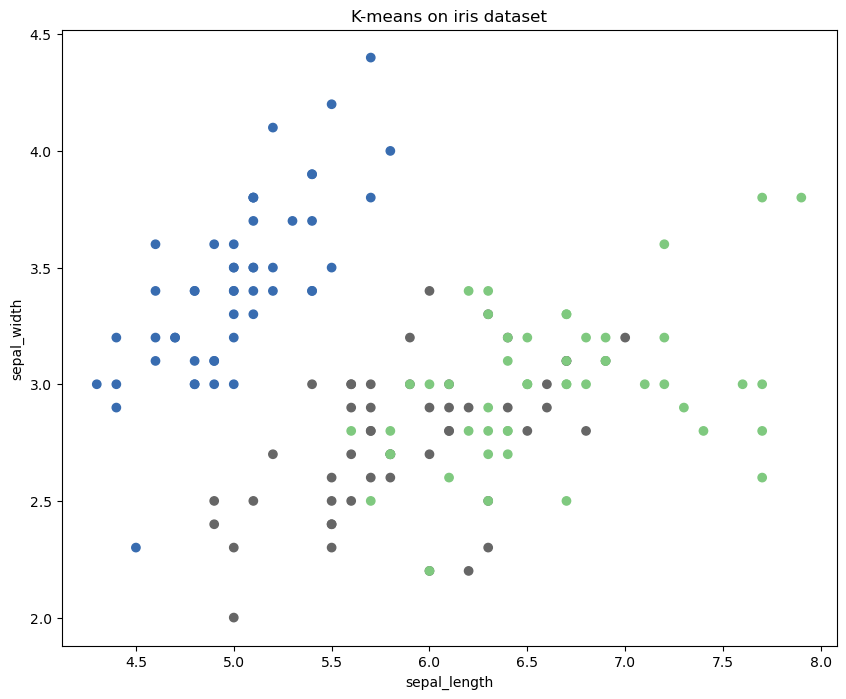

In [152]:
plt.figure(figsize=(10,8))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=df['cluster'],cmap='Accent')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('K-means on iris dataset')
plt.show()

In [1]:
# Clustering Customers Based on Spending Behavior

import pandas as pd

data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Spending_Score': [90, 85, 40, 30, 80, 75, 20, 10, 70, 95],
    'Annual_Income': [50000, 55000, 30000, 25000, 60000, 62000, 20000, 15000, 70000, 80000]
}
df = pd.DataFrame(data)
df

,CustomerID,Spending_Score,Annual_Income
0,1,90,50000
1,2,85,55000
2,3,40,30000
3,4,30,25000
4,5,80,60000
5,6,75,62000
6,7,20,20000
7,8,10,15000
8,9,70,70000
9,10,95,80000


In [3]:
from sklearn.cluster import KMeans

In [4]:
model=KMeans(n_clusters=3,random_state=42)

In [5]:
df['cluster']=model.fit_predict(df[['Spending_Score', 'Annual_Income']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
df

,CustomerID,Spending_Score,Annual_Income,cluster
0,1,90,50000,2
1,2,85,55000,2
2,3,40,30000,0
3,4,30,25000,0
4,5,80,60000,2
5,6,75,62000,2
6,7,20,20000,0
7,8,10,15000,0
8,9,70,70000,1
9,10,95,80000,1


In [7]:
import matplotlib.pyplot as plt

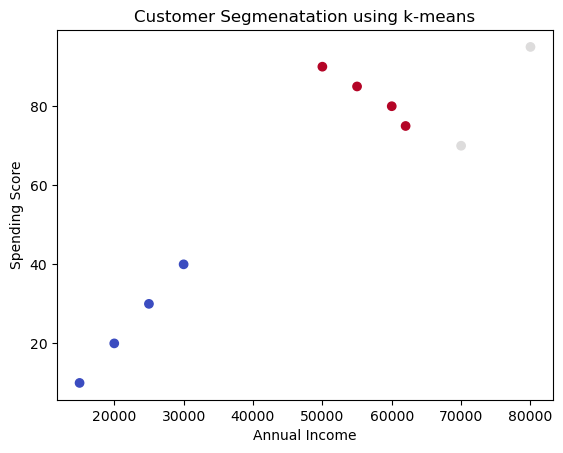

In [10]:
plt.scatter(df['Annual_Income'],df['Spending_Score'],c=df['cluster'],cmap='coolwarm')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmenatation using k-means')
plt.show()

In [11]:
# Gaussian Mixture Model (GMM) Clustering on Sales Data

import numpy as np

np.random.seed(42)
sales_data = {
    'Monthly_Sales': np.random.randint(100, 500, 20),
    'Product_Cost': np.random.randint(20, 100, 20)
}
df = pd.DataFrame(sales_data)
df

,Monthly_Sales,Product_Cost
0,202,49
1,448,57
2,370,21
3,206,83
4,171,79
5,288,40
6,120,52
7,202,95
8,221,77
9,314,41


In [12]:
from sklearn.mixture import GaussianMixture

In [13]:
gm=GaussianMixture(n_components=1,random_state=42)

In [14]:
df['cluster']=gm.fit_predict(df[['Monthly_Sales','Product_Cost']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
import matplotlib.pyplot as plt

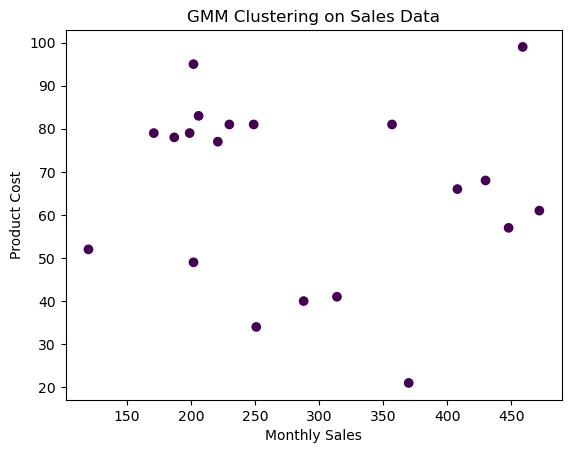

In [17]:
plt.scatter(df['Monthly_Sales'], df['Product_Cost'], c=df['cluster'], cmap='viridis')
plt.xlabel('Monthly Sales')
plt.ylabel('Product Cost')
plt.title('GMM Clustering on Sales Data')
plt.show()

In [18]:
# Clustering Countries Based on Population Growth

import pandas as pd
data = {
    'Country': ['USA', 'China', 'India', 'Brazil', 'Germany', 'UK', 'France', 'Canada', 'Japan', 'Russia'],
    'Population_Growth_Rate': [0.7, 0.4, 1.2, 0.9, 0.2, 0.3, 0.4, 0.6, -0.2, -0.1]
}
df = pd.DataFrame(data)
df

,Country,Population_Growth_Rate
0,USA,0.7
1,China,0.4
2,India,1.2
3,Brazil,0.9
4,Germany,0.2
5,UK,0.3
6,France,0.4
7,Canada,0.6
8,Japan,-0.2
9,Russia,-0.1


In [19]:
from sklearn.cluster import KMeans

In [20]:
df['cluster']=model.fit_predict(df[['Population_Growth_Rate']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
df

,Country,Population_Growth_Rate,cluster
0,USA,0.7,0
1,China,0.4,2
2,India,1.2,0
3,Brazil,0.9,0
4,Germany,0.2,2
5,UK,0.3,2
6,France,0.4,2
7,Canada,0.6,2
8,Japan,-0.2,1
9,Russia,-0.1,1


In [21]:
import matplotlib.pyplot as plt

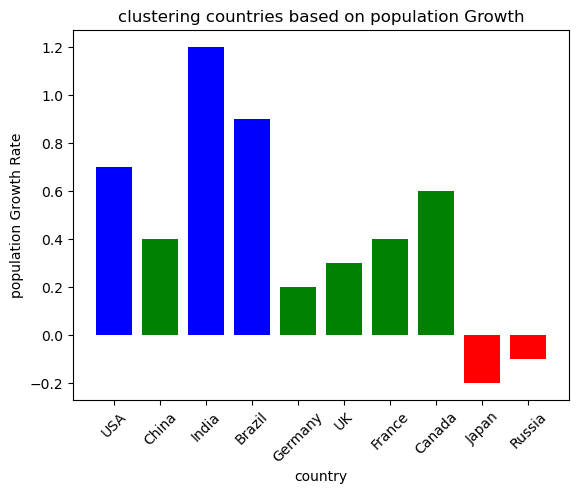

In [24]:
plt.bar(df['Country'],df['Population_Growth_Rate'],color=df['cluster'].map({0:'blue',1:'red',2:'green'}))
plt.xticks(rotation=45)
plt.xlabel('country')
plt.ylabel('population Growth Rate')
plt.title('clustering countries based on population Growth')
plt.show()

In [25]:
# DBSCAN for Anomaly Detection in Website Traffic

import pandas as pd
data = {
    'Visitors': [100, 105, 110, 500, 120, 130, 135, 140, 800, 150],
    'Bounce_Rate': [50, 55, 52, 90, 50, 45, 40, 42, 95, 38]
}
df = pd.DataFrame(data)
df

,Visitors,Bounce_Rate
0,100,50
1,105,55
2,110,52
3,500,90
4,120,50
5,130,45
6,135,40
7,140,42
8,800,95
9,150,38


In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
df_sclaed=scaler.fit_transform(df)

In [30]:
df_sclaed

array([[-0.58256052, -0.29785833],
       [-0.55998065, -0.03657909],
       [-0.53740079, -0.19334664],
       [ 1.22382869,  1.79237559],
       [-0.49224106, -0.29785833],
       [-0.44708133, -0.55913757],
       [-0.42450146, -0.82041681],
       [-0.4019216 , -0.71590512],
       [ 2.57862059,  2.05365483],
       [-0.35676187, -0.92492851]])

In [31]:
dbscan=DBSCAN(eps=1,min_samples=2)

In [34]:
df['cluster']=dbscan.fit_predict(df_sclaed)

In [35]:
df

,Visitors,Bounce_Rate,cluster
0,100,50,0
1,105,55,0
2,110,52,0
3,500,90,-1
4,120,50,0
5,130,45,0
6,135,40,0
7,140,42,0
8,800,95,-1
9,150,38,0


In [36]:
import matplotlib.pyplot as plt

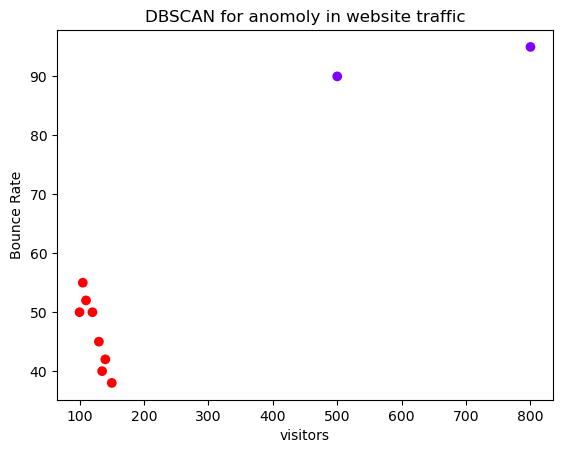

In [37]:
plt.scatter(df['Visitors'],df['Bounce_Rate'],c=df['cluster'],cmap='rainbow')
plt.xlabel('visitors')
plt.ylabel('Bounce Rate')
plt.title('DBSCAN for anomoly in website traffic')
plt.show()

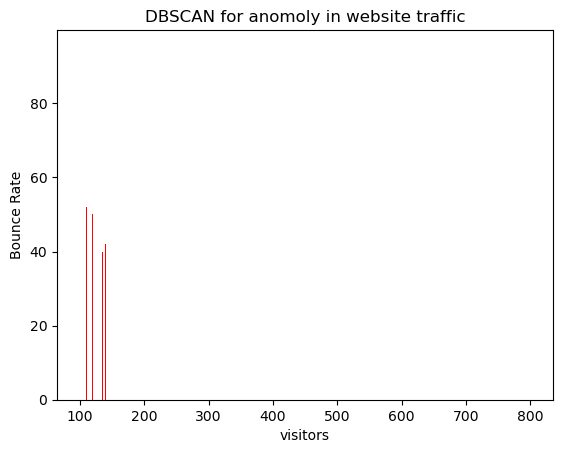

In [40]:
plt.bar(df['Visitors'],df['Bounce_Rate'],color=df['cluster'].map({-1:'blue',0:'red'}))
plt.xlabel('visitors')
plt.ylabel('Bounce Rate')
plt.title('DBSCAN for anomoly in website traffic')
plt.show()

In [41]:
#  Clustering Cities Based on Temperature and Rainfall

import pandas as pd
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'San Diego', 'Dallas', 'San Antonio', 'Seattle', 'Miami'],
    'Average_Temperature': [12, 18, 10, 22, 25, 19, 23, 26, 11, 27],
    'Rainfall': [1200, 380, 900, 1400, 250, 300, 1000, 1100, 1500, 1700]
}
df = pd.DataFrame(data)
df

,City,Average_Temperature,Rainfall
0,New York,12,1200
1,Los Angeles,18,380
2,Chicago,10,900
3,Houston,22,1400
4,Phoenix,25,250
5,San Diego,19,300
6,Dallas,23,1000
7,San Antonio,26,1100
8,Seattle,11,1500
9,Miami,27,1700


In [42]:
from sklearn.cluster import KMeans

In [43]:
model=KMeans(n_clusters=3,random_state=42)

In [44]:
df['cluster']=model.fit_predict(df[['Average_Temperature','Rainfall']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
df

,City,Average_Temperature,Rainfall,cluster
0,New York,12,1200,2
1,Los Angeles,18,380,1
2,Chicago,10,900,2
3,Houston,22,1400,0
4,Phoenix,25,250,1
5,San Diego,19,300,1
6,Dallas,23,1000,2
7,San Antonio,26,1100,2
8,Seattle,11,1500,0
9,Miami,27,1700,0


In [46]:
import matplotlib.pyplot as plt

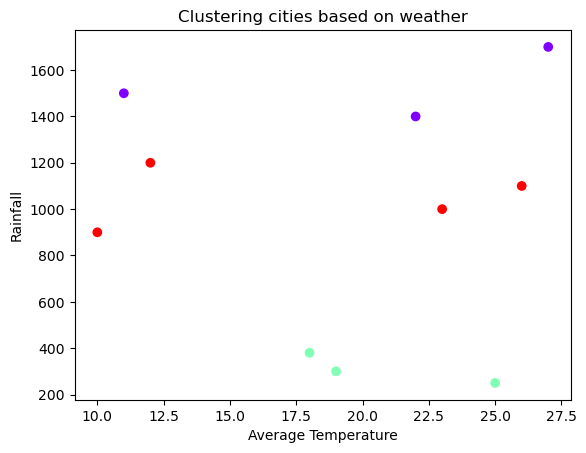

In [48]:
plt.scatter(df['Average_Temperature'],df['Rainfall'],c=df['cluster'],cmap='rainbow')
plt.xlabel('Average Temperature')
plt.ylabel('Rainfall')
plt.title('Clustering cities based on weather')
plt.show()

In [ ]:
plt.bar(df['Average_Temperature'],df['Rainfall'],color=df['cluster'].m)
plt.xlabel('Average Temperature')
plt.ylabel('Rainfall')
plt.title('Clustering cities based on weather')
plt.show()